# Libraries and Packages used

In [26]:
# load up the required libraries
import numpy as np
import pandas as pd
import sklearn as sk
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 1a. Loading up the data

In [ ]:
'''
1. loading process:
** dictionary or pandas dataframe
** divide into train and test set
** divide train into train and validation set
'''

In [12]:
all_files = os.listdir()
csv_files = []

# take out only the csv files
for f in all_files:
    if '.csv' in f:
        csv_files.append(f)
        
print("The files in the directory: ", all_files, "\n")
print("The csv files that are filtered: ", csv_files)

The files in the directory:  ['.ipynb_checkpoints', 'data-ear-1.csv', 'data-ear-2.csv', 'data-ear-3.csv', 'data-hand-landscape-1.csv', 'data-hand-landscape-2.csv', 'data-hand-landscape-3.csv', 'data-hand-portrait-1.csv', 'data-hand-portrait-2.csv', 'data-hand-portrait-3.csv', 'data-hand-swinging-1.csv', 'data-hand-swinging-2.csv', 'data-hand-swinging-3.csv', 'data-pocket-1.csv', 'data-pocket-2.csv', 'data-pocket-3.csv', 'mapsted_rd_project.ipynb', 'test-dataset-1.csv', 'test-dataset-2.csv', 'Testcase5_RD_Engineer.pdf'] 

The csv files that are filtered:  ['data-ear-1.csv', 'data-ear-2.csv', 'data-ear-3.csv', 'data-hand-landscape-1.csv', 'data-hand-landscape-2.csv', 'data-hand-landscape-3.csv', 'data-hand-portrait-1.csv', 'data-hand-portrait-2.csv', 'data-hand-portrait-3.csv', 'data-hand-swinging-1.csv', 'data-hand-swinging-2.csv', 'data-hand-swinging-3.csv', 'data-pocket-1.csv', 'data-pocket-2.csv', 'data-pocket-3.csv', 'test-dataset-1.csv', 'test-dataset-2.csv']


In [14]:
# function to load each dataset as a dictionary of pandas dataframes
def load_csv_file(flist):
    # flist: list of files to be loaded
    
    fdict = dict()
    for f in flist:
        csv_file = pd.read_csv(f)
        fdict[f] = csv_file
        print("The file -", f, "- has been loaded!")
    return fdict

# load each csv file with the load_csv_file function
csv_dict = load_csv_file(csv_files)

The file - data-ear-1.csv - has been loaded!
The file - data-ear-2.csv - has been loaded!
The file - data-ear-3.csv - has been loaded!
The file - data-hand-landscape-1.csv - has been loaded!
The file - data-hand-landscape-2.csv - has been loaded!
The file - data-hand-landscape-3.csv - has been loaded!
The file - data-hand-portrait-1.csv - has been loaded!
The file - data-hand-portrait-2.csv - has been loaded!
The file - data-hand-portrait-3.csv - has been loaded!
The file - data-hand-swinging-1.csv - has been loaded!
The file - data-hand-swinging-2.csv - has been loaded!
The file - data-hand-swinging-3.csv - has been loaded!
The file - data-pocket-1.csv - has been loaded!
The file - data-pocket-2.csv - has been loaded!
The file - data-pocket-3.csv - has been loaded!
The file - test-dataset-1.csv - has been loaded!
The file - test-dataset-2.csv - has been loaded!


In [28]:
print(csv_dict.keys())

dict_keys(['data-ear-1.csv', 'data-ear-2.csv', 'data-ear-3.csv', 'data-hand-landscape-1.csv', 'data-hand-landscape-2.csv', 'data-hand-landscape-3.csv', 'data-hand-portrait-1.csv', 'data-hand-portrait-2.csv', 'data-hand-portrait-3.csv', 'data-hand-swinging-1.csv', 'data-hand-swinging-2.csv', 'data-hand-swinging-3.csv', 'data-pocket-1.csv', 'data-pocket-2.csv', 'data-pocket-3.csv', 'test-dataset-1.csv', 'test-dataset-2.csv'])


# 1b. Examine the characteristics of each dataset

In [43]:
# function to examine each dataset when required
def examine_data(pd_data):
    # pd_data: should be a pandas loaded csv file!
    
    print("The features of the each dataset are as follows:")
    print(pd_data.columns.values)
    print("################################################\n\n")
    
    print("Shape of each dataset:")
    print(pd_data.shape)
    print("################################################\n\n")
    
    print("The first 10 rows of the file are: ")
    print(pd_data.head(10))
    print("################################################\n\n")
    
    print("Correlation between features of the file: ")
    print(pd_data.corr())
    print("################################################\n\n")
    
    print("Basic statistical analysis of the dataset: ")
    print(pd_data.describe())
    print("################################################\n\n")
    
    print("Examine the heatmap of the correlations of the dataset: ")
    plt.figure(figsize=(10, 5))      # Sample figsize in inches
    sns.heatmap(pd_data.corr(), cmap="RdYlGn")
    plt.show()
    print("################################################\n\n")
    
    '''
    print("Examining the variance and distribution between each feature")
    for i in range(1, pd_data.shape[1]):
        for j in range(1, pd_data.shape[1]):
            
            if i == j:
                continue
            
            else:
                plt.figure(figsize=(10, 5))
                x_axis = pd_data.columns.values[i]
                y_axis = pd_data.columns.values[j]
                
                top = "Plotting X-axis: " +  x_axis + " Vs. Y-axis: " + y_axis
                plt.title(top)
                plt.xlabel(x_axis)
                plt.ylabel(y_axis)
                plt.plot(pd_data[x_axis][:100], pd_data[y_axis][:100], 'r-')
                plt.show()
    print("################################################\n\n")
    '''

The features of the each dataset are as follows:
['Type' 'Time (ms)' ' X' ' Y' ' Z']
################################################


Shape of each dataset:
(20704, 5)
################################################


The first 10 rows of the file are: 
            Type  Time (ms)         X         Y         Z
0  ACCELEROMETER          0 -6.237086  7.429435 -1.201926
1      GYROSCOPE          1  0.090408 -0.108734 -0.024435
2      GYROSCOPE          1  0.086743 -0.103847 -0.024435
3        GRAVITY          2 -6.125897  7.530861 -1.389070
4  ACCELEROMETER          2 -6.225114  7.436617 -1.206715
5  ACCELEROMETER          3 -6.210749  7.422252 -1.201926
6      GYROSCOPE          3  0.095295 -0.108734 -0.018326
7  ACCELEROMETER          4 -6.208354  7.434223 -1.194743
8      GYROSCOPE          7  0.097738 -0.118508 -0.019548
9  ACCELEROMETER         13 -6.208354  7.419858 -1.199532
################################################


Correlation between features of the file: 
           

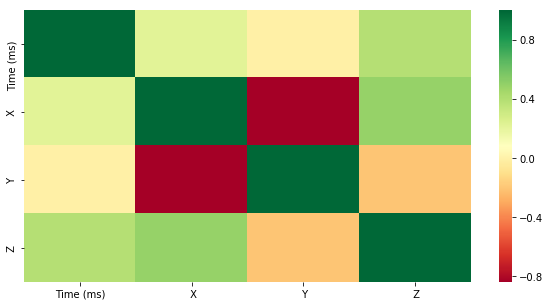

################################################




In [44]:
examine_data(csv_dict['data-ear-1.csv'])

The features of the each dataset are as follows:
['Type' 'Time (ms)' ' X' ' Y' ' Z']
################################################


Shape of each dataset:
(16330, 5)
################################################


The first 10 rows of the file are: 
            Type  Time (ms)         X         Y         Z
0  ACCELEROMETER          0  6.953537  6.939178  1.665405
1      GYROSCOPE          1 -0.322647 -0.435349 -0.469025
2        GRAVITY          1  6.802034  6.931047  1.365030
3  ACCELEROMETER          2  6.848251  7.051651  1.627121
4      GYROSCOPE          2 -0.317154 -0.432907 -0.460480
5  ACCELEROMETER          2  6.745361  7.133011  1.641479
6      GYROSCOPE          7 -0.315323 -0.425583 -0.448853
7  ACCELEROMETER          7  6.649658  7.168900  1.643875
8        GRAVITY          7  6.789684  6.943693  1.362241
9      GYROSCOPE          7 -0.315323 -0.412750 -0.432968
################################################


Correlation between features of the file: 
           

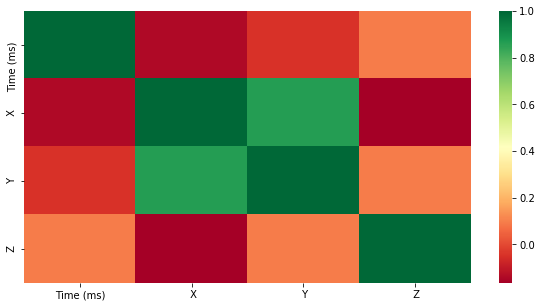

################################################




In [45]:
examine_data(csv_dict['data-ear-2.csv'])

# 2. Feature Engineering

In [47]:
'''
Problems involved - 
1. is the 'Type' feature important? 
2. is the 'Time (ms)' feature relevant?
3. should the files with names - 1, 2, 3 be combined?
'''
print("The above problems will be further examined below...")

The above problems will be further examined below...


In [86]:
# dealing with the 'Type' feature...
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ds1 = csv_dict['data-ear-1.csv']
ds2 = csv_dict['data-ear-2.csv']
np.random.seed(123)

# testing without using 'Type'
# number of clusters is set to 3 because of the 3 types


# 2a. Clustering without 'Type'

In [ ]:
'''
2. need for clustering?
** helps to identify outliers
** helps to identify class variability
** applying k-means...
** need other clustering algorithms?
'''

In [387]:
# function to apply standard scalers over the dataset
def std_scale(ds):
    std = StandardScaler()
    std_val = std.fit_transform(ds.iloc[:, 1:])
    return std_val

# function to apply scaling between range
def std_norm(matrix):
    
    sh = matrix.shape
    # initialise the new normalised matrix
    norm_mat = np.zeros(sh[0] * sh[1]).reshape(sh[0], -1)
    
    # take out a column
    for feature in range(sh[1]):
        column = matrix[:, feature]
        max_val = max(column)
        min_val = min(column)
        
        # take out each row (cell in column)
        for sample in range(sh[0]):
            normed = (column[sample] - min_val) / (max_val - min_val)
            norm_mat[sample, feature] = normed
    
    return norm_mat

# function to apply kmeans over the dataset
def k_means(ds, cls):
    model = KMeans(n_clusters=cls)
    model.fit(ds)
    return model

In [388]:
# applying the standard scaler function
std_ds1 = std_scale(ds1)
std_ds2 = std_scale(ds2)

# applying the normalisation function
norm_ds1 = std_norm(np.array(ds1.iloc[:, 1:]))
norm_ds2 = std_norm(np.array(ds2.iloc[:, 1:]))

# applying the kmeans on standard scaled data
km_ds1 = k_means(std_ds1, 3)
km_ds2 = k_means(std_ds2, 3)

# applying the kmeans on normalised data
km0_ds1 = k_means(norm_ds1, 3)
km0_ds2 = k_means(norm_ds2, 3)

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [389]:
# difference between standard scaler and standard norm functions...
t = 3
print("Minimums: ", min(std_ds1[:, t]), min(norm_ds1[:, t]))
print("Maximums: ", max(std_ds1[:, t]), max(norm_ds1[:, t]))

Minimums:  -3.235198213281745 0.0
Maximums:  5.77223835608355 1.0


Clustering with 3 centers using the standard scaler values...


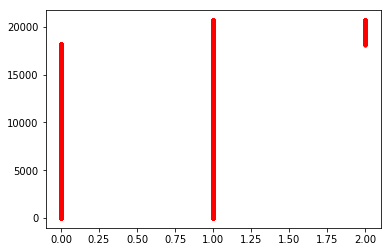

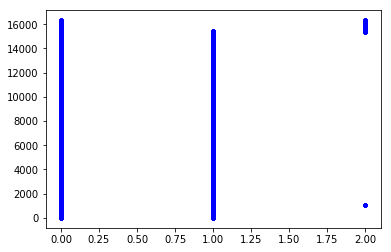

In [390]:
print("Clustering with 3 centers using the standard scaler values...")
# plotting each point in the data-ear-1 versus their label
plt.plot(km_ds1.labels_, np.arange(ds1.shape[0]), 'r.')
plt.show()

# plotting each point in the data-ear-2 versus their label
plt.plot(km_ds2.labels_, np.arange(ds2.shape[0]), 'b.')
plt.show()

Clustering with 3 centers using the standard norm values...


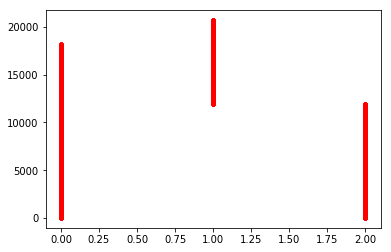

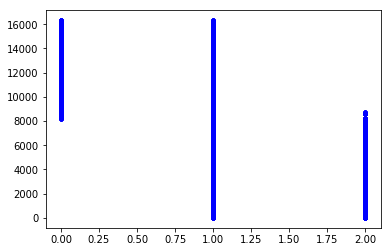

In [391]:
print("Clustering with 3 centers using the standard norm values...")

# plotting each point in the data-ear-1 versus their label
plt.plot(km0_ds1.labels_, np.arange(ds1.shape[0]), 'r.')
plt.show()

# plotting each point in the data-ear-2 versus their label
plt.plot(km0_ds2.labels_, np.arange(ds2.shape[0]), 'b.')
plt.show()

# 2b Clustering with 'Type'

In [417]:
# transform each dataset to include the 'Type' feature

# function to one-hot-encode they 'Type' as it is a categorical feature
def one_hot(ds, feature, loc):
    # ds: the pandas dataframe to be used as input
    
    onehot = []
    labset = set(ds.iloc[:, loc])
    print(labset)
    for s in labset:
        lab = (ds[feature] == s).astype('int')
        onehot.append(lab)
    
    return np.array(onehot).T

def one_hot_join(scaled, one_hot_res):
    # scaled: the transformed (scaled or normalized) data
    # one_hot_res: the result returned from the one_hot function
    
    joint = np.concatenate((scaled, one_hot_res), axis=1)
    return joint

In [403]:
# one hot encoding of datasets
onehot_ds1 = one_hot(ds1, 'Type', 0)
onehot_ds2 = one_hot(ds2, 'Type', 0)

# join the one hot encoded values - standard scaler
encode_ds1 = one_hot_join(std_ds1, onehot_ds1)
encode_ds2 = one_hot_join(std_ds2, onehot_ds2)

# join the one hot encoded values - normalised
encode0_ds1 = one_hot_join(norm_ds1, onehot_ds1)
encode0_ds2 = one_hot_join(norm_ds2, onehot_ds2)

# encoded standard scaler kmeans
km_en_ds1 = k_means(encode_ds1, 3)
km_en_ds2 = k_means(encode_ds2, 3)

# encoded normalised scaled kmeans
km_en0_ds1 = k_means(encode0_ds1, 3)
km_en0_ds2 = k_means(encode0_ds2, 3)

Clustering  AFTER ENCODING with 3 centers using the standard norm values...


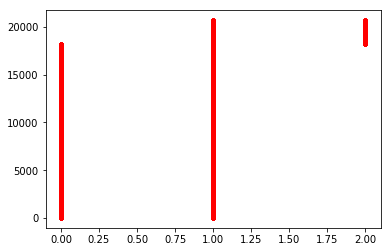

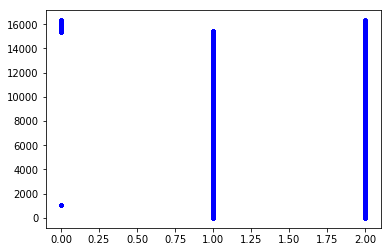

In [394]:
print("Clustering  AFTER ENCODING with 3 centers using the standard norm values...")
# plotting each point in the data-ear-1 versus their label
plt.plot(km_en_ds1.labels_, np.arange(ds1.shape[0]), 'r.')
plt.show()

# plotting each point in the data-ear-2 versus their label
plt.plot(km_en_ds2.labels_, np.arange(ds2.shape[0]), 'b.')
plt.show()

Clustering  AFTER ENCODING with 3 centers using the standard norm values...


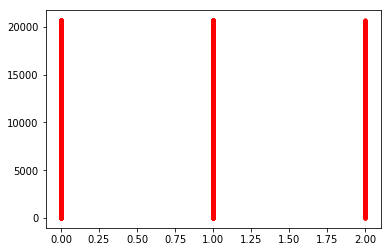

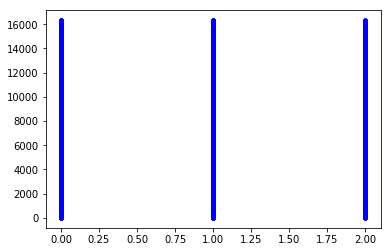

In [395]:
print("Clustering  AFTER ENCODING with 3 centers using the standard norm values...")
# plotting each point in the data-ear-1 versus their label
plt.plot(km_en0_ds1.labels_, np.arange(ds1.shape[0]), 'r.')
plt.show()

# plotting each point in the data-ear-2 versus their label
plt.plot(km_en0_ds2.labels_, np.arange(ds2.shape[0]), 'b.')
plt.show()

In [396]:
km_en0_ds1.labels_[:10]

array([0, 1, 1, 2, 0, 0, 1, 0, 1, 0])

In [397]:
encode0_ds1[:10, 4:]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
'''
The following are the conclusions from the clustering experiments:
1. The 'Type' feature is one-hot encoded and above results show that it is of more significance to the data
2. The 'Time (ms)' feature is significant in relation to the x, y and z axis values (will be seen when datasets are combined)
3. The normalization method will be chosen over the standard scaler method since it results in values between 0 and 1
'''

# 3. Combining and Seperating datasets

In [ ]:
'''
3. testing classifiers
** set datasets and classes
** train the classifiers


Goal: to create a classifier in a 5-class problem
1. Combine all the datasets and apply one hot encoding (for the 5 classes)
2. Keep the combined test datasets seperately
3. Seperate the combined input datasets into train and validation sets
'''

# 3a. Combine required data

In [398]:
# seperate train and test
ftrain = []
ftest = []

# using 'test' word to seperate out the test data
for f in csv_dict.keys():
    if 'test' in f:
        ftest.append(f)
    else:
        ftrain.append(f)


# function to combine datasets
def combine_data(fdict, flist):
    # fdict: the dictionary that contains all the files
    # flist: the list of files to be combined

    npcat = np.array(fdict[flist[0]])
    for i in range(1, len(flist)):
        fi = np.array(fdict[flist[i]])
        npcat = np.concatenate((npcat, fi), axis=0)
    
    return npcat

In [399]:
pd_train = combine_data(csv_dict, ftrain)
pd_test = combine_data(csv_dict, ftest)

In [309]:
csv_dict.keys()

dict_keys(['data-ear-1.csv', 'data-ear-2.csv', 'data-ear-3.csv', 'data-hand-landscape-1.csv', 'data-hand-landscape-2.csv', 'data-hand-landscape-3.csv', 'data-hand-portrait-1.csv', 'data-hand-portrait-2.csv', 'data-hand-portrait-3.csv', 'data-hand-swinging-1.csv', 'data-hand-swinging-2.csv', 'data-hand-swinging-3.csv', 'data-pocket-1.csv', 'data-pocket-2.csv', 'data-pocket-3.csv', 'test-dataset-1.csv', 'test-dataset-2.csv'])

# 3b. One-hot encoding of classes

In [372]:
# now attach a class id for each dataset
class_dict = dict()
unique_id = []
for f in csv_dict.keys():
    
    if 'test' in f:
        # skipping the test files
        continue
    
    else:
        # get the class id
        class_id = f[:-5]
        unique_id.append(class_id)

        # create a dataframe of the id having length the same as that of the particular dataset
        list_id = pd.DataFrame([class_id] * csv_dict[f].shape[0], columns=['class_id'])

        # join the id dataframe with the dataset dataframe
        class_dict[f] = pd.concat([csv_dict[f], list_id], axis=1)
    
print("Unique class names: ", set(unique_id))

Unique class names:  {'data-ear-', 'data-pocket-', 'data-hand-landscape-', 'data-hand-swinging-', 'data-hand-portrait-'}


In [412]:
# class id has been added
cols = class_dict['data-pocket-1.csv'].columns.values
cols

array(['Type', 'Time (ms)', ' X', ' Y', ' Z', 'class_id'], dtype=object)

# 3c. Joining the pieces

In [453]:
# combine the labeled data
train_class = combine_data(class_dict, ftrain)
print("Required training data is combined: ", train_class.shape)

# encoding each dataset with its class
encode_class = one_hot(pd.DataFrame(train_class, columns=cols), 'class_id', 5)
print("Encoding with 'class_id' is complete: ", encode_class.shape)

# encoding each dataset with its 'Type'
encode_type = one_hot(pd.DataFrame(train_class, columns=cols), 'Type', 0)
print("Encoding with 'Type' is complete: ", encode_type.shape)
                
# normalize the dataset
norm_train = std_norm(pd_train[:, 1:])
print("Normalization of training data is complete: ", norm_train.shape)

# join the encoding
train_data = np.concatenate((encode_type, norm_train), axis=1)
print("Final training set is collected! ", train_data.shape)

Required training data is combined:  (283034, 6)
{'data-ear-', 'data-pocket-', 'data-hand-landscape-', 'data-hand-swinging-', 'data-hand-portrait-'}
Encoding with 'class_id' is complete:  (283034, 5)
{'GRAVITY', 'MAGNETOMETER', 'ACCELEROMETER', 'BAROMETER', 'GYROSCOPE'}
Encoding with 'Type' is complete:  (283034, 5)
Normalization of training data is complete:  (283034, 4)
Final training set is collected!  (283034, 9)


# 4. Building and Training the Classifier

In [ ]:
'''
4. classifier result analysis
** examine predictions
** study residuals 
** try different testing metrics
'''

In [458]:
from sklearn.model_selection import KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense

# 4a. Training the Model

In [464]:
folds = KFold(n_splits=10, shuffle=True, random_state=123)

errors = []
accuracies = []
models = []
f = 0

for train, test in folds.split(train_data):
    X_train, Y_train = train_data[train], encode_class[train]
    X_test, Y_test = train_data[test], encode_class[test]
    
    print("Train shapes: ", X_train.shape, Y_train.shape)
    print("Test shapes: ", X_test.shape, Y_test.shape)
    
    # further splitting the train set into train and validation sets
    X_train_val, X_validation, Y_train_val, Y_validation = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
    
    # creating the nn architecture
    # input layer - 9 features plus 1 bias
    # hidden layer - 50 neurons
    # output layer - 5 neurons for 5 class classifier
    model = Sequential([Dense(10, input_dim=9, activation='relu'), Dense(50, activation='relu'), Dense(5)])

    # compiling the nn using adam optimizer and mean squared error as loss function
    model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
    
    #testing parameters
    results = model.fit(X_train_val, Y_train_val, epochs=100, validation_data=(X_validation, Y_validation))
    test_results = model.evaluate(X_test, Y_test)

    print("\nLoss: {}".format(test_results[0]))
    print("\nAccuracy: {}%".format(test_results[1]*100))
    print(model.summary())
    
    f += 1
    print("Cross-val fold: ", f, " is complete!")
    print('#################################\n\n\n')
    
    # collect the loss and accuracies
    errors.append(test_results[0])
    accuracies.append(test_results[1]*100)
    models.append(model)

Train shapes:  (254730, 9) (254730, 5)
Test shapes:  (28304, 9) (28304, 5)
Train on 178311 samples, validate on 76419 samples
Epoch 1/100
178311/178311 [==============================] - 15s 82us/step - loss: 0.1183 - acc: 0.5172 - val_loss: 0.1002 - val_acc: 0.5950
Epoch 2/100
178311/178311 [==============================] - 14s 80us/step - loss: 0.0939 - acc: 0.6001 - val_loss: 0.0897 - val_acc: 0.6022
Epoch 3/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0877 - acc: 0.6277 - val_loss: 0.0860 - val_acc: 0.6480
Epoch 4/100
178311/178311 [==============================] - 14s 80us/step - loss: 0.0845 - acc: 0.6457 - val_loss: 0.0835 - val_acc: 0.6614
Epoch 5/100
178311/178311 [==============================] - 14s 78us/step - loss: 0.0820 - acc: 0.6614 - val_loss: 0.0813 - val_acc: 0.6637
Epoch 6/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0801 - acc: 0.6761 - val_loss: 0.0786 - val_acc: 0.6888
Epoch 7/100
178311/178311 [=

Epoch 58/100
178311/178311 [==============================] - 14s 78us/step - loss: 0.0634 - acc: 0.7428 - val_loss: 0.0637 - val_acc: 0.7431
Epoch 59/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0633 - acc: 0.7442 - val_loss: 0.0633 - val_acc: 0.7428
Epoch 60/100
178311/178311 [==============================] - 14s 77us/step - loss: 0.0633 - acc: 0.7431 - val_loss: 0.0628 - val_acc: 0.7481
Epoch 61/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0632 - acc: 0.7445 - val_loss: 0.0642 - val_acc: 0.7382
Epoch 62/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0631 - acc: 0.7440 - val_loss: 0.0636 - val_acc: 0.7427
Epoch 63/100
178311/178311 [==============================] - 14s 79us/step - loss: 0.0631 - acc: 0.7442 - val_loss: 0.0642 - val_acc: 0.7319
Epoch 64/100
178311/178311 [==============================] - 14s 78us/step - loss: 0.0631 - acc: 0.7444 - val_loss: 0.0638 - val_acc: 0.7417
Epoch 

178311/178311 [==============================] - 16s 92us/step - loss: 0.0736 - acc: 0.7021 - val_loss: 0.0751 - val_acc: 0.6960
Epoch 9/100
178311/178311 [==============================] - 16s 92us/step - loss: 0.0726 - acc: 0.7065 - val_loss: 0.0719 - val_acc: 0.7134
Epoch 10/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0718 - acc: 0.7103 - val_loss: 0.0721 - val_acc: 0.7022
Epoch 11/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0711 - acc: 0.7118 - val_loss: 0.0714 - val_acc: 0.7110
Epoch 12/100
178311/178311 [==============================] - 15s 86us/step - loss: 0.0705 - acc: 0.7136 - val_loss: 0.0715 - val_acc: 0.7101
Epoch 13/100
178311/178311 [==============================] - 15s 84us/step - loss: 0.0701 - acc: 0.7147 - val_loss: 0.0695 - val_acc: 0.7234
Epoch 14/100
178311/178311 [==============================] - 15s 83us/step - loss: 0.0697 - acc: 0.7158 - val_loss: 0.0715 - val_acc: 0.7061
Epoch 15/100
178311/

Epoch 66/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0617 - acc: 0.7475 - val_loss: 0.0616 - val_acc: 0.7409
Epoch 67/100
178311/178311 [==============================] - 16s 91us/step - loss: 0.0617 - acc: 0.7484 - val_loss: 0.0632 - val_acc: 0.7404
Epoch 68/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0617 - acc: 0.7495 - val_loss: 0.0624 - val_acc: 0.7459
Epoch 69/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0616 - acc: 0.7491 - val_loss: 0.0622 - val_acc: 0.7521
Epoch 70/100
178311/178311 [==============================] - 16s 92us/step - loss: 0.0615 - acc: 0.7494 - val_loss: 0.0614 - val_acc: 0.7522
Epoch 71/100
178311/178311 [==============================] - 16s 91us/step - loss: 0.0614 - acc: 0.7492 - val_loss: 0.0617 - val_acc: 0.7503
Epoch 72/100
178311/178311 [==============================] - 16s 91us/step - loss: 0.0614 - acc: 0.7491 - val_loss: 0.0621 - val_acc: 0.7464
Epoch 

178311/178311 [==============================] - 15s 83us/step - loss: 0.0713 - acc: 0.7187 - val_loss: 0.0714 - val_acc: 0.7218
Epoch 17/100
178311/178311 [==============================] - 15s 84us/step - loss: 0.0711 - acc: 0.7202 - val_loss: 0.0710 - val_acc: 0.7194
Epoch 18/100
178311/178311 [==============================] - 16s 88us/step - loss: 0.0709 - acc: 0.7193 - val_loss: 0.0709 - val_acc: 0.7244
Epoch 19/100
178311/178311 [==============================] - 15s 86us/step - loss: 0.0707 - acc: 0.7209 - val_loss: 0.0717 - val_acc: 0.7104
Epoch 20/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0706 - acc: 0.7208 - val_loss: 0.0716 - val_acc: 0.7169
Epoch 21/100
178311/178311 [==============================] - 17s 95us/step - loss: 0.0704 - acc: 0.7210 - val_loss: 0.0732 - val_acc: 0.7050
Epoch 22/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0702 - acc: 0.7214 - val_loss: 0.0710 - val_acc: 0.7172
Epoch 23/100
178311

Epoch 74/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0673 - acc: 0.7318 - val_loss: 0.0665 - val_acc: 0.7390
Epoch 75/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0672 - acc: 0.7310 - val_loss: 0.0677 - val_acc: 0.7339
Epoch 76/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0672 - acc: 0.7311 - val_loss: 0.0687 - val_acc: 0.7254
Epoch 77/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0671 - acc: 0.7313 - val_loss: 0.0669 - val_acc: 0.7349
Epoch 78/100
178311/178311 [==============================] - 16s 91us/step - loss: 0.0671 - acc: 0.7320 - val_loss: 0.0675 - val_acc: 0.7292
Epoch 79/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0670 - acc: 0.7324 - val_loss: 0.0667 - val_acc: 0.7329
Epoch 80/100
178311/178311 [==============================] - 16s 91us/step - loss: 0.0670 - acc: 0.7319 - val_loss: 0.0664 - val_acc: 0.7350
Epoch 

178311/178311 [==============================] - 16s 90us/step - loss: 0.0693 - acc: 0.7218 - val_loss: 0.0711 - val_acc: 0.7020
Epoch 25/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0692 - acc: 0.7220 - val_loss: 0.0680 - val_acc: 0.7263
Epoch 26/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0690 - acc: 0.7217 - val_loss: 0.0690 - val_acc: 0.7233
Epoch 27/100
178311/178311 [==============================] - 16s 90us/step - loss: 0.0689 - acc: 0.7230 - val_loss: 0.0684 - val_acc: 0.7259
Epoch 28/100
178311/178311 [==============================] - 16s 88us/step - loss: 0.0687 - acc: 0.7235 - val_loss: 0.0680 - val_acc: 0.7211
Epoch 29/100
178311/178311 [==============================] - 16s 87us/step - loss: 0.0685 - acc: 0.7248 - val_loss: 0.0693 - val_acc: 0.7136
Epoch 30/100
178311/178311 [==============================] - 16s 89us/step - loss: 0.0684 - acc: 0.7239 - val_loss: 0.0699 - val_acc: 0.7167
Epoch 31/100
178311

Epoch 82/100
178311/178311 [==============================] - 9s 52us/step - loss: 0.0631 - acc: 0.7453 - val_loss: 0.0622 - val_acc: 0.7482
Epoch 83/100
178311/178311 [==============================] - 9s 50us/step - loss: 0.0631 - acc: 0.7463 - val_loss: 0.0631 - val_acc: 0.7501
Epoch 84/100
178311/178311 [==============================] - 9s 51us/step - loss: 0.0630 - acc: 0.7470 - val_loss: 0.0624 - val_acc: 0.7537
Epoch 85/100
178311/178311 [==============================] - 9s 51us/step - loss: 0.0630 - acc: 0.7469 - val_loss: 0.0627 - val_acc: 0.7472
Epoch 86/100
178311/178311 [==============================] - 9s 50us/step - loss: 0.0630 - acc: 0.7465 - val_loss: 0.0622 - val_acc: 0.7528
Epoch 87/100
178311/178311 [==============================] - 9s 49us/step - loss: 0.0630 - acc: 0.7466 - val_loss: 0.0626 - val_acc: 0.7481
Epoch 88/100
178311/178311 [==============================] - 9s 51us/step - loss: 0.0629 - acc: 0.7467 - val_loss: 0.0632 - val_acc: 0.7475
Epoch 89/100


178311/178311 [==============================] - 10s 56us/step - loss: 0.0682 - acc: 0.7271 - val_loss: 0.0695 - val_acc: 0.7315
Epoch 33/100
178311/178311 [==============================] - 11s 61us/step - loss: 0.0680 - acc: 0.7282 - val_loss: 0.0677 - val_acc: 0.7240
Epoch 34/100
178311/178311 [==============================] - 11s 60us/step - loss: 0.0679 - acc: 0.7285 - val_loss: 0.0683 - val_acc: 0.7315
Epoch 35/100
178311/178311 [==============================] - 12s 66us/step - loss: 0.0676 - acc: 0.7293 - val_loss: 0.0677 - val_acc: 0.7299
Epoch 36/100
178311/178311 [==============================] - 10s 56us/step - loss: 0.0673 - acc: 0.7305 - val_loss: 0.0668 - val_acc: 0.7314
Epoch 37/100
178311/178311 [==============================] - 9s 53us/step - loss: 0.0669 - acc: 0.7329 - val_loss: 0.0685 - val_acc: 0.7221
Epoch 38/100
178311/178311 [==============================] - 10s 55us/step - loss: 0.0666 - acc: 0.7328 - val_loss: 0.0671 - val_acc: 0.7322
Epoch 39/100
178311/

Epoch 90/100
178311/178311 [==============================] - 9s 48us/step - loss: 0.0624 - acc: 0.7478 - val_loss: 0.0624 - val_acc: 0.7505
Epoch 91/100
178311/178311 [==============================] - 8s 47us/step - loss: 0.0624 - acc: 0.7473 - val_loss: 0.0620 - val_acc: 0.7484
Epoch 92/100
178311/178311 [==============================] - 9s 48us/step - loss: 0.0624 - acc: 0.7467 - val_loss: 0.0624 - val_acc: 0.7474
Epoch 93/100
178311/178311 [==============================] - 8s 47us/step - loss: 0.0624 - acc: 0.7474 - val_loss: 0.0618 - val_acc: 0.7539
Epoch 94/100
178311/178311 [==============================] - 9s 48us/step - loss: 0.0624 - acc: 0.7470 - val_loss: 0.0645 - val_acc: 0.7336
Epoch 95/100
178311/178311 [==============================] - 9s 49us/step - loss: 0.0623 - acc: 0.7485 - val_loss: 0.0627 - val_acc: 0.7509
Epoch 96/100
178311/178311 [==============================] - 9s 48us/step - loss: 0.0624 - acc: 0.7488 - val_loss: 0.0622 - val_acc: 0.7521
Epoch 97/100


178311/178311 [==============================] - 10s 56us/step - loss: 0.0677 - acc: 0.7272 - val_loss: 0.0677 - val_acc: 0.7251
Epoch 41/100
178311/178311 [==============================] - 10s 55us/step - loss: 0.0675 - acc: 0.7279 - val_loss: 0.0679 - val_acc: 0.7233
Epoch 42/100
178311/178311 [==============================] - 10s 56us/step - loss: 0.0675 - acc: 0.7271 - val_loss: 0.0674 - val_acc: 0.7258
Epoch 43/100
178311/178311 [==============================] - 10s 54us/step - loss: 0.0675 - acc: 0.7283 - val_loss: 0.0674 - val_acc: 0.7276
Epoch 44/100
178311/178311 [==============================] - 10s 56us/step - loss: 0.0674 - acc: 0.7284 - val_loss: 0.0687 - val_acc: 0.7202
Epoch 45/100
178311/178311 [==============================] - 10s 56us/step - loss: 0.0673 - acc: 0.7288 - val_loss: 0.0670 - val_acc: 0.7246
Epoch 46/100
178311/178311 [==============================] - 10s 56us/step - loss: 0.0674 - acc: 0.7277 - val_loss: 0.0668 - val_acc: 0.7273
Epoch 47/100
178311

Epoch 98/100
178311/178311 [==============================] - 10s 55us/step - loss: 0.0660 - acc: 0.7333 - val_loss: 0.0659 - val_acc: 0.7349
Epoch 99/100
178311/178311 [==============================] - 10s 57us/step - loss: 0.0659 - acc: 0.7344 - val_loss: 0.0657 - val_acc: 0.7344
Epoch 100/100
28303/28303 [==============================] - 1s 24us/step

Loss: 0.06532437463072135

Accuracy: 73.42331201670991%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_44 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 255       
Total params: 905
Trainable params: 905
Non-trainable params: 0
___________________________________________________________

178311/178311 [==============================] - 13s 72us/step - loss: 0.0673 - acc: 0.7301 - val_loss: 0.0675 - val_acc: 0.7281
Epoch 49/100
178311/178311 [==============================] - 13s 72us/step - loss: 0.0671 - acc: 0.7300 - val_loss: 0.0665 - val_acc: 0.7286
Epoch 50/100
178311/178311 [==============================] - 13s 71us/step - loss: 0.0671 - acc: 0.7297 - val_loss: 0.0666 - val_acc: 0.7263
Epoch 51/100
178311/178311 [==============================] - 13s 72us/step - loss: 0.0670 - acc: 0.7312 - val_loss: 0.0670 - val_acc: 0.7313
Epoch 52/100
178311/178311 [==============================] - 13s 74us/step - loss: 0.0669 - acc: 0.7314 - val_loss: 0.0668 - val_acc: 0.7268
Epoch 53/100
178311/178311 [==============================] - 15s 82us/step - loss: 0.0669 - acc: 0.7316 - val_loss: 0.0665 - val_acc: 0.7379
Epoch 54/100
178311/178311 [==============================] - 13s 74us/step - loss: 0.0667 - acc: 0.7325 - val_loss: 0.0666 - val_acc: 0.7356
Epoch 55/100
178311

Train shapes:  (254731, 9) (254731, 5)
Test shapes:  (28303, 9) (28303, 5)
Train on 178311 samples, validate on 76420 samples
Epoch 1/100
178311/178311 [==============================] - 13s 72us/step - loss: 0.1193 - acc: 0.5075 - val_loss: 0.0972 - val_acc: 0.5933
Epoch 2/100
178311/178311 [==============================] - 13s 71us/step - loss: 0.0910 - acc: 0.6204 - val_loss: 0.0868 - val_acc: 0.6555
Epoch 3/100
178311/178311 [==============================] - 12s 70us/step - loss: 0.0842 - acc: 0.6469 - val_loss: 0.0821 - val_acc: 0.6576
Epoch 4/100
178311/178311 [==============================] - 12s 70us/step - loss: 0.0807 - acc: 0.6646 - val_loss: 0.0798 - val_acc: 0.6683
Epoch 5/100
178311/178311 [==============================] - 13s 75us/step - loss: 0.0781 - acc: 0.6791 - val_loss: 0.0779 - val_acc: 0.6844
Epoch 6/100
178311/178311 [==============================] - 12s 70us/step - loss: 0.0757 - acc: 0.6921 - val_loss: 0.0745 - val_acc: 0.6915
Epoch 7/100
178311/178311 [=

Epoch 58/100
178311/178311 [==============================] - 11s 60us/step - loss: 0.0623 - acc: 0.7444 - val_loss: 0.0634 - val_acc: 0.7407
Epoch 59/100
178311/178311 [==============================] - 11s 60us/step - loss: 0.0622 - acc: 0.7442 - val_loss: 0.0625 - val_acc: 0.7406
Epoch 60/100
178311/178311 [==============================] - 11s 61us/step - loss: 0.0622 - acc: 0.7434 - val_loss: 0.0639 - val_acc: 0.7467
Epoch 61/100
178311/178311 [==============================] - 12s 70us/step - loss: 0.0622 - acc: 0.7444 - val_loss: 0.0631 - val_acc: 0.7404
Epoch 62/100
178311/178311 [==============================] - 14s 77us/step - loss: 0.0621 - acc: 0.7449 - val_loss: 0.0615 - val_acc: 0.7493
Epoch 63/100
178311/178311 [==============================] - 13s 70us/step - loss: 0.0621 - acc: 0.7445 - val_loss: 0.0629 - val_acc: 0.7448
Epoch 64/100
178311/178311 [==============================] - 21s 116us/step - loss: 0.0621 - acc: 0.7451 - val_loss: 0.0630 - val_acc: 0.7297
Epoch

178311/178311 [==============================] - 12s 70us/step - loss: 0.0735 - acc: 0.7133 - val_loss: 0.0739 - val_acc: 0.7090
Epoch 9/100
178311/178311 [==============================] - 12s 68us/step - loss: 0.0726 - acc: 0.7171 - val_loss: 0.0728 - val_acc: 0.7179
Epoch 10/100
178311/178311 [==============================] - 12s 69us/step - loss: 0.0721 - acc: 0.7182 - val_loss: 0.0720 - val_acc: 0.7192
Epoch 11/100
178311/178311 [==============================] - 12s 70us/step - loss: 0.0715 - acc: 0.7195 - val_loss: 0.0726 - val_acc: 0.7120
Epoch 12/100
178311/178311 [==============================] - 13s 74us/step - loss: 0.0710 - acc: 0.7205 - val_loss: 0.0728 - val_acc: 0.7019
Epoch 13/100
178311/178311 [==============================] - 13s 71us/step - loss: 0.0704 - acc: 0.7210 - val_loss: 0.0704 - val_acc: 0.7187
Epoch 14/100
178311/178311 [==============================] - 12s 67us/step - loss: 0.0700 - acc: 0.7227 - val_loss: 0.0704 - val_acc: 0.7211
Epoch 15/100
178311/

Epoch 66/100
178311/178311 [==============================] - 10s 54us/step - loss: 0.0632 - acc: 0.7444 - val_loss: 0.0635 - val_acc: 0.7414
Epoch 67/100
178311/178311 [==============================] - 10s 53us/step - loss: 0.0631 - acc: 0.7449 - val_loss: 0.0656 - val_acc: 0.7284
Epoch 68/100
178311/178311 [==============================] - 9s 52us/step - loss: 0.0631 - acc: 0.7451 - val_loss: 0.0640 - val_acc: 0.7402
Epoch 69/100
178311/178311 [==============================] - 10s 54us/step - loss: 0.0631 - acc: 0.7452 - val_loss: 0.0639 - val_acc: 0.7405
Epoch 70/100
178311/178311 [==============================] - 13s 73us/step - loss: 0.0631 - acc: 0.7452 - val_loss: 0.0636 - val_acc: 0.7477
Epoch 71/100
178311/178311 [==============================] - 12s 69us/step - loss: 0.0630 - acc: 0.7457 - val_loss: 0.0673 - val_acc: 0.7201
Epoch 72/100
178311/178311 [==============================] - 12s 65us/step - loss: 0.0630 - acc: 0.7455 - val_loss: 0.0632 - val_acc: 0.7455
Epoch 7

178311/178311 [==============================] - 14s 77us/step - loss: 0.0709 - acc: 0.7204 - val_loss: 0.0714 - val_acc: 0.7204
Epoch 17/100
178311/178311 [==============================] - 14s 80us/step - loss: 0.0706 - acc: 0.7207 - val_loss: 0.0705 - val_acc: 0.7204
Epoch 18/100
178311/178311 [==============================] - 13s 70us/step - loss: 0.0702 - acc: 0.7230 - val_loss: 0.0697 - val_acc: 0.7274
Epoch 19/100
178311/178311 [==============================] - 15s 87us/step - loss: 0.0699 - acc: 0.7248 - val_loss: 0.0700 - val_acc: 0.7146
Epoch 20/100
178311/178311 [==============================] - 15s 85us/step - loss: 0.0697 - acc: 0.7240 - val_loss: 0.0697 - val_acc: 0.7263
Epoch 21/100
178311/178311 [==============================] - 17s 93us/step - loss: 0.0693 - acc: 0.7251 - val_loss: 0.0702 - val_acc: 0.7185
Epoch 22/100
178311/178311 [==============================] - 16s 87us/step - loss: 0.0691 - acc: 0.7261 - val_loss: 0.0713 - val_acc: 0.7202
Epoch 23/100
178311

Epoch 74/100
178311/178311 [==============================] - 12s 67us/step - loss: 0.0631 - acc: 0.7446 - val_loss: 0.0632 - val_acc: 0.7490
Epoch 75/100
178311/178311 [==============================] - 14s 76us/step - loss: 0.0631 - acc: 0.7454 - val_loss: 0.0628 - val_acc: 0.7502
Epoch 76/100
178311/178311 [==============================] - 12s 66us/step - loss: 0.0631 - acc: 0.7449 - val_loss: 0.0635 - val_acc: 0.7506
Epoch 77/100
178311/178311 [==============================] - 11s 61us/step - loss: 0.0631 - acc: 0.7455 - val_loss: 0.0626 - val_acc: 0.7502
Epoch 78/100
178311/178311 [==============================] - 11s 60us/step - loss: 0.0630 - acc: 0.7457 - val_loss: 0.0623 - val_acc: 0.7517
Epoch 79/100
178311/178311 [==============================] - 11s 64us/step - loss: 0.0630 - acc: 0.7452 - val_loss: 0.0632 - val_acc: 0.7501
Epoch 80/100
178311/178311 [==============================] - 11s 60us/step - loss: 0.0629 - acc: 0.7457 - val_loss: 0.0643 - val_acc: 0.7445
Epoch 

# 4b. Making Predictions with the Model

In [486]:
# moving onto the test data files...

# encode the test data 'type' feature
test_encode_type = one_hot(pd.DataFrame(pd_test, columns=cols[:-1]), 'Type', 0)
print("Test data files 'Type' feature is one hot encoded: ", test_encode_type.shape)

# normalize test data
test_norm = std_norm(pd_test[:, 1:])
print("Test data normalisation completed: ", test_norm.shape)

# combine the test dataset
zero = np.zeros(test_encode_type.shape[0]).reshape(-1, 1)
test_data = np.concatenate((test_encode_type[:, 1].reshape(-1, 1), zero, test_encode_type[:, 2].reshape(-1, 1), zero,
                            test_encode_type[:, 0].reshape(-1, 1), test_norm), axis=1)
print("Combined test data: ", test_data.shape)

{'GYROSCOPE', 'GRAVITY', 'ACCELEROMETER'}
Test data files 'Type' feature is one hot encoded:  (75194, 3)
Test data normalisation completed:  (75194, 4)
Combined test data:  (75194, 9)


In [487]:
# looking into model results
print("Errors found in each of the trained models: ")
print(errors)
print("Accuracy calculated in each of the trained models: ")
print(accuracies)

Errors found in each of the trained models: 
[0.06086042340989122, 0.059165786544820256, 0.06585255669668914, 0.06298659515707691, 0.0612338049603078, 0.06532437463072135, 0.06320236865234295, 0.060013586100144414, 0.06417451622437426, 0.06190314461262459]
Accuracy calculated in each of the trained models: 
[75.23318258903335, 75.87266817410966, 73.32532504239684, 74.667891464104, 75.14397767058017, 73.42331201670991, 74.56453379518834, 75.75522029503695, 74.11935130567326, 74.79419142920756]


In [511]:
# prediction and store final test results
predicted = []

# using each model to get results
for mod in range(len(models)):
    predict = models[mod].predict_classes(test_data)
    print("The classes found in, model-", mod, " - ", set(predict))
    predicted.append(predict)

The classes found in, model- 0  -  {0, 1, 2, 3, 4}
The classes found in, model- 1  -  {0, 1, 2, 3}
The classes found in, model- 2  -  {0, 1, 2, 3}
The classes found in, model- 3  -  {0, 1, 3}
The classes found in, model- 4  -  {0, 1, 2, 3, 4}
The classes found in, model- 5  -  {0, 1, 2, 3, 4}
The classes found in, model- 6  -  {0, 1, 3}
The classes found in, model- 7  -  {0, 1, 2, 3}
The classes found in, model- 8  -  {0, 1, 2, 3}
The classes found in, model- 9  -  {1, 3}


In [514]:
'''
# testing model aggragation / ensemble learning

final_class = np.zeros(test_data.shape[0]).reshape(test_data.shape[0], 1)

for idx in range(len(test_data)):
    sample_res = []

    for res in predicted:
        lab = res[idx]
        sample_res.append(lab)
        
    # create an empty list to count number of occurences of a class
    final = [0] * 5
    
    for i in sample_res:
        final[i] += 1
        
    max_lab = max(final)
    
    pt = 0
    for i in range(len(final)):
        if final[i] == max_lab:
            pt = i
            break
            
    final_class[idx] = pt
'''

In [533]:
# interestingly not all models return each class 
# problem in training where each training data does not contain samples of certain classes
# hence we will choose a model that has good accuracy and includes all the classes
# model 0 is choosen

print("Classes obtained as a result of the 'best model': ", set(predicted[0]))
print("Label of each class: ", set(unique_id))

class_names = list(set(unique_id))
predicted_names = []
for i in predicted[0]:
    name = class_names[i]
    predicted_names.append(name)
    
encoded_result = one_hot(pd.DataFrame(predicted[0], columns=['class_id']), 'class_id', 0)

Classes obtained as a result of the 'best model':  {0, 1, 2, 3, 4}
Label of each class:  {'data-ear-', 'data-pocket-', 'data-hand-landscape-', 'data-hand-swinging-', 'data-hand-portrait-'}
{0, 1, 2, 3, 4}


In [537]:
# creating the final new dataframe of results
pd_classes = pd.DataFrame(predicted_names, columns=['class_id'])
pd_encoded = pd.DataFrame(encoded_result, columns=class_names)
pd_tested = pd.DataFrame(pd_test, columns=cols[:-1])

pd_classes.shape, pd_encoded.shape, pd_tested.shape

((75194, 1), (75194, 5), (75194, 5))

In [540]:
# setting up the final dataframe
pd_result = pd.concat([pd_tested, pd_encoded, pd_classes], axis=1)
print("Final result dataframe has been formed! ",pd_result.shape)

# store the final dataframe as a csv file
pd_result.to_csv('test_results.csv', index=False)
print("Final results have been stored in 'test_results.csv'!!")

Final result dataframe has been formed!  (75194, 11)
Final results have been stored in 'test_results.csv'!!
